In [98]:
import pystac_client
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# Load in Estancias Coords

In [99]:
import geopandas as gpd
estancias = gpd.read_file("Estancias_corrals_from_sat_imagery")
type(estancias)

geopandas.geodataframe.GeoDataFrame

In [100]:
#indexing operations convert geopandas dataframe to vanilla pandas dataframe
#so we need to store the crs in a variable to access it later
estancias_crs = estancias.crs
estancias_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
estancias

,fid,locus_id,project_id,locus_name,survey_gri,lat,lon,area,locus_conf,locus_type,...,created_by,created_da,edited_by,edited_dat,approved_b,approved_d,approved,superappro,mark_for_d,geometry
0,1.0,41934.0,14.0,Unknown,NaN,NaN,NaN,NaN,4 - High Confidence,6.0,...,139.0,2022-04-11T12:10:42.069Z,139.0,2022-04-11T17:17:06.224Z,NaN,2022-04-11T12:27:30.970Z,0.0,0.0,0.0,POINT (-71.49383 -15.50503)
1,2.0,41949.0,14.0,Unknown,NaN,NaN,NaN,NaN,5 - Very High Confidence,13.0,...,139.0,2022-04-18T11:31:03.791Z,NaN,2022-04-18T11:31:03.791Z,NaN,2022-04-18T11:31:03.791Z,0.0,0.0,0.0,POINT (-71.50849 -15.53076)
2,3.0,42027.0,14.0,Unknown,NaN,NaN,NaN,NaN,4 - High Confidence,6.0,...,139.0,2022-04-25T16:16:00.830Z,NaN,2022-04-25T16:16:00.830Z,NaN,2022-04-25T16:16:00.830Z,0.0,0.0,0.0,POINT (-71.58987 -15.60777)
3,4.0,462.0,14.0,Unknown,738.0,-16.910967,-70.644626,NaN,4 - High Confidence,6.0,...,95.0,2020-02-05T10:21:08.000Z,22.0,2021-09-03T14:56:19.868Z,22.0,2020-02-26T00:28:17.000Z,1.0,1.0,NaN,POINT (-70.64463 -16.91097)
4,5.0,10936.0,14.0,Jahexuti_200609-201123,11381.0,-17.040630,-69.742321,NaN,4 - High Confidence,6.0,...,96.0,2020-06-09T17:11:23.000Z,22.0,2021-09-03T14:56:19.868Z,107.0,2020-08-27T09:17:00.000Z,1.0,1.0,NaN,POINT (-69.74232 -17.04063)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,9539.0,13538.0,14.0,Kurufedu_200410-042408,14911.0,-16.095296,-70.985209,NaN,3 - Medium Confidence,6.0,...,107.0,2020-07-01T08:25:55.000Z,22.0,2021-09-03T14:56:19.868Z,107.0,2020-08-28T16:42:27.000Z,1.0,1.0,NaN,POINT (-70.98521 -16.09530)
9539,9540.0,13542.0,14.0,Kurufedu_200410-042408,14911.0,-16.096054,-70.974107,NaN,3 - Medium Confidence,6.0,...,107.0,2020-07-01T08:45:24.000Z,22.0,2021-09-03T14:56:19.868Z,107.0,2020-08-28T16:43:07.000Z,1.0,1.0,NaN,POINT (-70.97411 -16.09605)
9540,9541.0,19829.0,14.0,Mexehawu_200714-202317,21632.0,-15.147478,-73.133663,NaN,3 - Medium Confidence,6.0,...,95.0,2020-07-30T14:34:46.000Z,22.0,2021-09-03T14:56:19.868Z,107.0,2020-08-26T13:55:46.000Z,1.0,1.0,NaN,POINT (-73.13366 -15.14748)
9541,9542.0,19900.0,14.0,Mexehawu_200714-202317,21763.0,-15.229275,-73.143675,NaN,3 - Medium Confidence,6.0,...,95.0,2020-07-30T19:39:03.000Z,22.0,2021-09-03T14:56:19.868Z,107.0,2020-08-26T13:56:16.000Z,1.0,1.0,NaN,POINT (-73.14368 -15.22928)


In [102]:
estancias = estancias[['fid','locus_type','lat','lon']].dropna().reset_index()
estancias

,index,fid,locus_type,lat,lon
0,3,4.0,6.0,-16.910967,-70.644626
1,4,5.0,6.0,-17.040630,-69.742321
2,5,6.0,13.0,-17.310982,-69.975398
3,6,7.0,13.0,-15.070609,-73.132203
4,7,8.0,13.0,-15.070327,-73.116103
...,...,...,...,...,...
9535,9538,9539.0,6.0,-16.095296,-70.985209
9536,9539,9540.0,6.0,-16.096054,-70.974107
9537,9540,9541.0,6.0,-15.147478,-73.133663
9538,9541,9542.0,6.0,-15.229275,-73.143675


# Get 10,000 Sample Points within 3 km of Estancias

We use np.random to select 10_000 estancias, azimuths, and distances to get random points

In [103]:
import numpy as np
import pyproj as pyproj

n = 10_000
estancias_idx = np.random.randint(0,len(estancias), n)
azimuths = np.random.rand(n) * 360
dists = 3_000 * np.sqrt(np.random.rand(n)) #distance in meters

sample_pts = estancias[['fid','lat','lon']].loc[estancias_idx].copy().reset_index()
sample_pts.rename(columns = {'lat':'estancia_lat','lon':'estancia_lon'}, inplace = True)
sample_pts['azimuth'] = azimuths
sample_pts['distance'] = dists

ellipsoid = pyproj.Geod(ellps = 'WGS84')

sample_coords = ellipsoid.fwd(sample_pts['estancia_lon'], sample_pts['estancia_lat'], 
                              azimuths, dists)
sample_pts['sample_pt_lat'] = sample_coords[1]
sample_pts['sample_pt_lon'] = sample_coords[0]

sample_pts

,index,fid,estancia_lat,estancia_lon,azimuth,distance,sample_pt_lat,sample_pt_lon
0,5552,5556.0,-15.996053,-69.862646,316.711664,1344.540753,-15.987208,-69.871259
1,7874,7878.0,-16.186398,-70.779631,176.705223,1085.533267,-16.196191,-70.779048
2,5371,5375.0,-16.013035,-70.183483,31.169831,2144.650685,-15.996452,-70.173113
3,7870,7874.0,-16.190268,-70.836541,110.476002,2761.447016,-16.198996,-70.812348
4,8136,8140.0,-14.945877,-73.060550,213.374096,2833.162054,-14.967259,-73.075039
...,...,...,...,...,...,...,...,...
9995,6371,6375.0,-15.469082,-71.369799,172.908398,2973.233631,-15.495746,-71.366378
9996,9270,9274.0,-16.248806,-70.078308,292.589199,2242.296800,-16.241022,-70.097673
9997,6099,6103.0,-15.556853,-70.700935,1.701736,2978.801748,-15.529945,-70.700111
9998,5615,5619.0,-16.049164,-69.786184,316.734560,1076.616802,-16.042080,-69.793079


In [104]:
#double check we transformed correctly
inverses = ellipsoid.inv(sample_pts['estancia_lon'],sample_pts['estancia_lat'],
                         sample_pts['sample_pt_lon'], sample_pts['sample_pt_lat'])
np.max(sample_pts['distance'] - inverses[2])

2.418346412014216e-09

## Load in Assets w/ ODC.stac

In [111]:
point = {"type": "Point", "coordinates": [sample_pts['sample_pt_lon'][0], sample_pts['sample_pt_lat'][0]]}

In [112]:
import odc.stac

bands_of_interest = ["nir08", "red"]
time_range = "2020-6"
#bbox = [-71.5375, -16.6735, -70.9718, -16.4090] #arequipa (NW) to omate (SE) (roughly, Rio Yarabamba
#point = {"type": "Point", "coordinates": [-70.73556, -15.725]} #lake lagunillas
search = catalog.search(collections=["landsat-c2-l2"], intersects=point, datetime=time_range)
items = search.get_all_items()

data = odc.stac.stac_load(
    [items[0]], bands=bands_of_interest,intersects=point
).squeeze()#.isel(time=0)

In [107]:
bands_of_interest = ["250m_16_days_EVI"]
search = catalog.search(collections=["modis-13Q1-061"], intersects=point, datetime="2021-02-10")
items = search.get_all_items()

data = odc.stac.load(
    items,
    #crs="EPSG:3857",
    bands="250m_16_days_NDVI",
    resolution=500,
    intersects=point,
)
data = data.rio.reproject(estancias_crs)
data = data["250m_16_days_NDVI"]

data.sel({"x":-71,"y":-16},method = "nearest")

<xarray.DataArray '250m_16_days_NDVI' (time: 2)>
array([574, 603], dtype=int16)
Coordinates:
    x            float64 -71.0
    y            float64 -16.0
  * time         (time) datetime64[ns] 2021-02-02 2021-02-10
    spatial_ref  int64 0
Attributes:
    _FillValue:  -32768

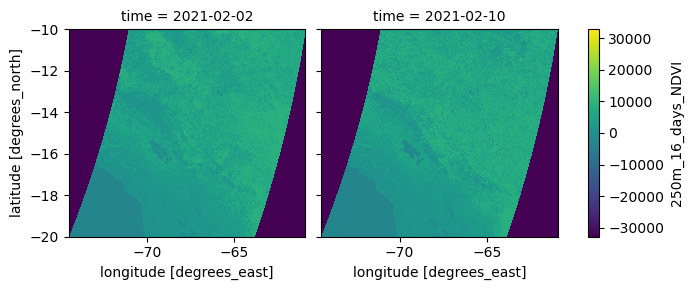

In [108]:
data.plot.imshow(cmap="viridis", col="time")

In [109]:
bands_of_interest = ["250m_16_days_EVI"]
search = catalog.search(collections=["modis-13Q1-061"], intersects=point, datetime="2021-02-10")
items = search.get_all_items()

data = odc.stac.load(
    items,
    crs="EPSG:3857",
    bands="250m_16_days_NDVI",
    resolution=250,
    intersects=point,
)
data = data.rio.reproject(estancias_crs)
data = data["250m_16_days_NDVI"]

data.sel({"x":-71,"y":-16},method = "nearest")

<xarray.DataArray '250m_16_days_NDVI' (time: 2)>
array([564, 619], dtype=int16)
Coordinates:
    x            float64 -71.0
    y            float64 -16.0
  * time         (time) datetime64[ns] 2021-02-02 2021-02-10
    spatial_ref  int64 0
Attributes:
    _FillValue:  -32768

In [125]:
poly = items[0].geometry["coordinates"]

In [128]:
import shapely
from shapely.geometry import Polygon

In [133]:
poly

[[[-74.4924441, -20],
  [-71.0885854, -9.9498355],
  [-60.6884065, -9.9684312],
  [-63.5893387, -20.0179228],
  [-74.4924441, -20]]]

In [134]:
spoly = Polygon(poly[0])

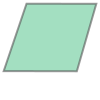

In [135]:
spoly.contains(

In [119]:
items[0].geometry

{'type': 'Polygon',
 'coordinates': [[[-74.4924441, -20],
   [-71.0885854, -9.9498355],
   [-60.6884065, -9.9684312],
   [-63.5893387, -20.0179228],
   [-74.4924441, -20]]]}

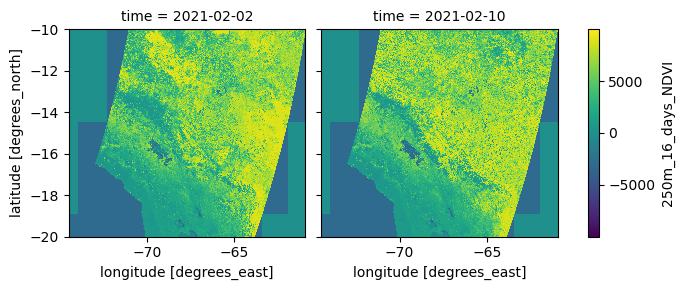

In [110]:
data.plot.imshow(cmap="viridis", col="time")

In [87]:
data.sel({"x":-71,"y":-16},method = "nearest")

<xarray.DataArray '500m_16_days_NDVI' (time: 2)>
array([624, 663], dtype=int16)
Coordinates:
    x            float64 -71.0
    y            float64 -16.0
  * time         (time) datetime64[ns] 2021-02-02 2021-02-10
    spatial_ref  int64 0
Attributes:
    _FillValue:  -32768

In [42]:
data.plot.imshow()

AttributeError: '_Dataset_PlotMethods' object has no attribute 'imshow'

In [37]:
data["500m_16_days_NDVI"].max()

<xarray.DataArray '500m_16_days_NDVI' ()>
array(0, dtype=int16)
Coordinates:
    spatial_ref  int32 3857

In [11]:
print("\n".join(data.spatial_ref.attrs['spatial_ref'].split(",")))

PROJCRS["WGS 84 / UTM zone 18N"
BASEGEOGCRS["WGS 84"
ENSEMBLE["World Geodetic System 1984 ensemble"
MEMBER["World Geodetic System 1984 (Transit)"]
MEMBER["World Geodetic System 1984 (G730)"]
MEMBER["World Geodetic System 1984 (G873)"]
MEMBER["World Geodetic System 1984 (G1150)"]
MEMBER["World Geodetic System 1984 (G1674)"]
MEMBER["World Geodetic System 1984 (G1762)"]
MEMBER["World Geodetic System 1984 (G2139)"]
ELLIPSOID["WGS 84"
6378137
298.257223563
LENGTHUNIT["metre"
1]]
ENSEMBLEACCURACY[2.0]]
PRIMEM["Greenwich"
0
ANGLEUNIT["degree"
0.0174532925199433]]
ID["EPSG"
4326]]
CONVERSION["UTM zone 18N"
METHOD["Transverse Mercator"
ID["EPSG"
9807]]
PARAMETER["Latitude of natural origin"
0
ANGLEUNIT["degree"
0.0174532925199433]
ID["EPSG"
8801]]
PARAMETER["Longitude of natural origin"
-75
ANGLEUNIT["degree"
0.0174532925199433]
ID["EPSG"
8802]]
PARAMETER["Scale factor at natural origin"
0.9996
SCALEUNIT["unity"
1]
ID["EPSG"
8805]]
PARAMETER["False easting"
500000
LENGTHUNIT["metre"
1]
ID["EPSG

# Transform between CRS of imagery asset and Estancias shapefile

In [12]:
import pyproj as pyproj

In [13]:
in_crs = pyproj.crs.CRS(estancias_crs)
out_crs = pyproj.crs.CRS(data.spatial_ref.crs_wkt)
transformer = pyproj.Transformer.from_crs(in_crs, out_crs, always_xy = True)

In [14]:
transformer.source_crs

<Geographic 2D CRS: GEOGCRS["WGS 84 (with axis order normalized for vi ...>
Name: WGS 84 (with axis order normalized for visualization)
Axis Info [ellipsoidal]:
- Lon[east]: Geodetic longitude (degree)
- Lat[north]: Geodetic latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
transformer.target_crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
data = data.rio.reproject(estancias_crs)
data = data.rename({"x":"lon","y":"lat"})

In [17]:
data['lat']

<xarray.DataArray 'lat' (lat: 6976)>
array([-14.93543 , -14.935707, -14.935983, ..., -16.862301, -16.862578,
       -16.862854])
Coordinates:
  * lat          (lat) float64 -14.94 -14.94 -14.94 ... -16.86 -16.86 -16.86
    time         datetime64[ns] 2020-12-31T14:12:07.580997
    spatial_ref  int64 0
Attributes:
    axis:           Y
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

# Get in-bounds condition

Because image assets are usually skew off the axes of the actual dataframe, there are points within the dataframe that aren't actually part of the imagery. To test if a point is actually in the image we need to do some math 

In [18]:
import numpy as np
import time

In [19]:
images = [data[band] for band in data]
sum_image = images[0]
for img in images[1:]:
    sum_image = sum_image + img
sum_image = sum_image
#sum_image = sum_image.to_numpy()

In [20]:
start = time.time()
nz_lon_idx = sum_image.sum(dim = 'lat').to_numpy().nonzero()
nz_lat_idx = sum_image.sum(dim = 'lon').to_numpy().nonzero()

mnlnidx = np.min(nz_lon_idx); mxlnidx = np.max(nz_lon_idx);
mnltidx = np.min(nz_lat_idx); mxltidx = np.max(nz_lat_idx);

lb_rb = sum_image['lon'][[mnlnidx,mxlnidx]]
bb_tb = sum_image['lat'][[mnltidx, mxltidx]]

left_bound = min(lb_rb).item(); right_bound = max(lb_rb).item()
bottom_bound = min(bb_tb).item(); top_bound = max(bb_tb).item()


-1 * (start - time.time())

0.34776949882507324

In [21]:
left_bound,right_bound,bottom_bound, top_bound

(-73.68955523528223,
 -71.52807767570422,
 -16.832457218550665,
 -14.969419414066543)

In [22]:
import pandas as pd

In [23]:
def_in_img = pd.DataFrame({"lon":[-69.2],"lat":[-16]})

In [24]:
def_in_img

,lon,lat
0,-69.2,-16


In [25]:
start = time.time()
left_col_nz = sum_image.loc[:,left_bound].to_numpy().nonzero()[0][0]
top_row_nz = sum_image.loc[top_bound,:].to_numpy().nonzero()[0][0]
bottom_row_nz = sum_image.loc[bottom_bound,:].to_numpy().nonzero()[0][0]

left_vertex_lat = sum_image['lat'][left_col_nz].item()
top_vertex_lon = sum_image['lon'][top_row_nz].item()
bottom_vertex_lon = sum_image['lon'][bottom_row_nz].item()
-1 * (start - time.time())

0.011382102966308594

In [26]:
top_vertex_lon, bottom_vertex_lon, left_vertex_lat

(-73.31788720694773, -71.88206038521835, -16.570769766630395)

In [27]:
top_vertex = (top_vertex_lon, top_bound)
left_vertex = (left_bound, left_vertex_lat)
bottom_vertex = (bottom_vertex_lon, bottom_bound)

In [28]:
top_vertex,left_vertex,bottom_vertex

((-73.31788720694773, -14.969419414066543),
 (-73.68955523528223, -16.570769766630395),
 (-71.88206038521835, -16.832457218550665))

In [29]:
tv_lv_slope = (top_vertex[1] - left_vertex[1])/(top_vertex[0] - left_vertex[0])
tv_lv_slope

4.308550185873546

In [30]:
#m = (y2-y1)/(x2-x1)
lv_tv_slope = (top_vertex[1] - left_vertex[1])/(top_vertex[0] - left_vertex[0])
lv_bv_slope = (bottom_vertex[1] - left_vertex[1])/(bottom_vertex[0] - left_vertex[0])
#y=mx+b -> b = y - mx
lv_tv_yintercept = left_vertex[1] - (lv_tv_slope * left_vertex[0])
bv_rv_yintercept = bottom_vertex[1] - (lv_tv_slope * bottom_vertex[0])
lv_bv_yintercept = left_vertex[1] - (lv_bv_slope * left_vertex[0])
tv_rv_yintercept = top_vertex[1] - (lv_bv_slope * top_vertex[0])

lv_tv_slope, lv_bv_slope, lv_tv_yintercept, bv_rv_yintercept, lv_bv_yintercept, tv_rv_yintercept

(4.308550185873546,
 -0.14477908576670218,
 300.92437713928376,
 292.8750074151554,
 -27.239476204149458,
 -25.584316094234623)

In [31]:
def is_in_bds(lon, lat):
    lv_tv_transform = lat - tv_lv_slope * lon
    lv_bv_transform = lat - lv_bv_slope * lon
    in_ud_dir = (lv_tv_transform <= lv_tv_yintercept) & (lv_tv_transform >= bv_rv_yintercept)
    in_lr_dir = (lv_bv_transform <= tv_rv_yintercept) & (lv_bv_transform >= lv_bv_yintercept)
    return(in_ud_dir & in_lr_dir)

In [32]:
is_in_bds(def_in_img['lon'],def_in_img['lat'])

0    False
dtype: bool

# Attach NDVI to imagery asset

In [33]:
nir_arr = data["nir08"]
red_arr = data["red"]
denom_arr = nir_arr + red_arr
data["ndvi"] = (nir_arr - red_arr) / (nir_arr + red_arr)
data["ndvi"] = data["ndvi"].where(denom_arr != 0, 0)

In [34]:
data["ndvi"].max()

<xarray.DataArray 'ndvi' ()>
array(3.96313782)
Coordinates:
    time         datetime64[ns] 2020-12-31T14:12:07.580997
    spatial_ref  int64 0

In [35]:
in_bds_idx = is_in_bds(sample_pts['sample_pt_lon'],sample_pts['sample_pt_lat'])
in_bds = sample_pts[in_bds_idx]

In [36]:
in_bds

,index,fid,estancia_lat,estancia_lon,azimuth,distance,sample_pt_lat,sample_pt_lon
0,6856,6860.0,-15.268031,-72.286296,60.379250,2746.405921,-15.255762,-72.264071
1,8915,8919.0,-15.700553,-71.878006,116.183534,989.083368,-15.704497,-71.869725
10,843,847.0,-15.390243,-72.765954,69.491888,2061.721697,-15.383714,-72.747967
14,669,673.0,-15.141053,-72.973140,133.329109,2811.564980,-15.158488,-72.954110
24,457,461.0,-15.313591,-72.398124,294.512618,1190.881387,-15.309126,-72.408214
...,...,...,...,...,...,...,...,...
9967,795,799.0,-15.696244,-72.748817,156.866075,2925.672863,-15.720557,-72.738093
9980,717,721.0,-15.818215,-72.773222,288.781063,1429.204767,-15.814056,-72.785853
9986,1055,1059.0,-16.023211,-72.142532,15.808190,1504.313516,-16.010131,-72.138703
9987,1017,1021.0,-15.959667,-72.170141,64.247982,2732.590063,-15.948937,-72.147152


In [37]:
pts = zip(in_bds["sample_pt_lon"], in_bds["sample_pt_lat"])
ndvis = []
for p in pts:
    ndvis.append(data.sel({"lon":p[0],"lat":p[1]},method = "nearest")["ndvi"].item())
sample_pts.loc[np.where(in_bds_idx)[0],'ndvi'] = ndvis
print(len(ndvis))

2265


In [38]:
#ndvis

In [39]:
len(ndvis)

2265

In [40]:
sum(sample_pts['ndvi'].isnull())

7735

In [41]:
sample_pts

,index,fid,estancia_lat,estancia_lon,azimuth,distance,sample_pt_lat,sample_pt_lon,ndvi
0,6856,6860.0,-15.268031,-72.286296,60.379250,2746.405921,-15.255762,-72.264071,0.000000
1,8915,8919.0,-15.700553,-71.878006,116.183534,989.083368,-15.704497,-71.869725,1.000061
2,6327,6331.0,-15.723900,-70.375548,93.060333,1843.443952,-15.724788,-70.358373,NaN
3,6111,6115.0,-15.581711,-71.212420,53.019637,2183.308870,-15.569842,-71.196159,NaN
4,890,894.0,-15.065520,-72.441114,193.260169,2285.093464,-15.085621,-72.445989,NaN
...,...,...,...,...,...,...,...,...,...
9995,5490,5494.0,-16.062206,-70.094710,298.391131,2772.888535,-16.050290,-70.117507,NaN
9996,9045,9049.0,-16.214919,-71.161341,278.883755,2721.837431,-16.211119,-71.186492,NaN
9997,8856,8860.0,-15.525939,-71.630043,138.591148,2915.649221,-15.545701,-71.612065,1.000070
9998,1393,1397.0,-14.865903,-72.776319,158.484634,1564.526215,-14.879057,-72.770987,NaN


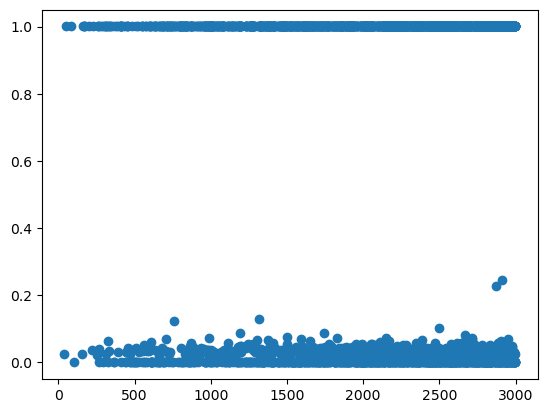

In [42]:
plt.scatter(in_bds['distance'],ndvis)

In [43]:
tpidx = sample_pts.index[sample_pts['ndvi'].isnull()][0]

In [44]:
sample_pts.iloc[tpidx]

index            6327.000000
fid              6331.000000
estancia_lat      -15.723900
estancia_lon      -70.375548
azimuth            93.060333
distance         1843.443952
sample_pt_lat     -15.724788
sample_pt_lon     -70.358373
ndvi                     NaN
Name: 2, dtype: float64

# Pipeline

In [93]:
n = 100_000
estancias_idx = np.random.randint(0,len(estancias), n)
azimuths = np.random.rand(n) * 360
#dists = 2_000 * np.sqrt(np.random.rand(n)) #distance in meters
dists = 100 * np.random.rand(n)

sample_pts = estancias[['fid','lat','lon']].loc[estancias_idx].copy().reset_index()
sample_pts.rename(columns = {'lat':'estancia_lat','lon':'estancia_lon'}, inplace = True)
sample_pts['azimuth'] = azimuths
sample_pts['distance'] = dists

ellipsoid = pyproj.Geod(ellps = 'WGS84')

sample_coords = ellipsoid.fwd(sample_pts['estancia_lon'], sample_pts['estancia_lat'], 
                              azimuths, dists)
sample_pts['sample_pt_lat'] = sample_coords[1]
sample_pts['sample_pt_lon'] = sample_coords[0]
sample_pts['ndvi'] = np.nan
sample_pts

,index,fid,estancia_lat,estancia_lon,azimuth,distance,sample_pt_lat,sample_pt_lon,ndvi
0,823,827.0,-15.068990,-72.439373,41.218714,85.568729,-15.068408,-72.438849,NaN
1,715,719.0,-15.805187,-72.791277,228.459022,26.179160,-15.805344,-72.791460,NaN
2,3969,3973.0,-15.196862,-73.133862,17.060067,68.959130,-15.196266,-73.133674,NaN
3,3432,3436.0,-15.757794,-71.185102,151.621257,19.348781,-15.757948,-71.185016,NaN
4,6260,6264.0,-15.528540,-71.187754,117.836263,86.912175,-15.528907,-71.187037,NaN
...,...,...,...,...,...,...,...,...,...
99995,607,611.0,-15.290395,-73.126369,7.981329,5.925926,-15.290342,-73.126362,NaN
99996,2184,2188.0,-16.785465,-70.417340,24.128824,29.727695,-16.785220,-70.417226,NaN
99997,4595,4599.0,-16.428861,-69.746484,96.130079,62.872366,-16.428922,-69.745899,NaN
99998,9141,9145.0,-16.085524,-69.803080,82.235471,0.951882,-16.085523,-69.803071,NaN


In [94]:
def get_sum_image(data_xr):
    images = [data_xr[band] for band in data_xr]
    sum_image = images[0]
    for img in images[1:]:
        sum_image = sum_image + img

    return(sum_image)

In [95]:
def get_bounds(sum_image):
    nz_lon_idx = sum_image.sum(dim = 'lat').to_numpy().nonzero()
    nz_lat_idx = sum_image.sum(dim = 'lon').to_numpy().nonzero()

    mnlnidx = np.min(nz_lon_idx); mxlnidx = np.max(nz_lon_idx);
    mnltidx = np.min(nz_lat_idx); mxltidx = np.max(nz_lat_idx);

    lb_rb = sum_image['lon'][[mnlnidx,mxlnidx]]
    bb_tb = sum_image['lat'][[mnltidx, mxltidx]]
    left_bound = min(lb_rb).item(); right_bound = max(lb_rb).item()
    bottom_bound = min(bb_tb).item(); top_bound = max(bb_tb).item()
    
    return((left_bound, right_bound, top_bound, bottom_bound))

In [96]:
def get_vertices(sum_image):
    
    lb, rb, ub, bb = get_bounds(sum_image)
    
    left_col_nz = sum_image.loc[:,lb].to_numpy().nonzero()[0][0]
    right_col_nz = sum_image.loc[:,rb].to_numpy().nonzero()[0][0]
    top_row_nz = sum_image.loc[ub,:].to_numpy().nonzero()[0][0]
    bottom_row_nz = sum_image.loc[bb,:].to_numpy().nonzero()[0][0]

    left_vertex_lat = sum_image['lat'][left_col_nz].item()
    right_vertex_lat = sum_image['lat'][right_col_nz].item()
    top_vertex_lon = sum_image['lon'][top_row_nz].item()
    bottom_vertex_lon = sum_image['lon'][bottom_row_nz].item()

    left_vertex = (lb, left_vertex_lat)
    right_vertex = (rb, right_vertex_lat)
    top_vertex = (top_vertex_lon, ub)
    bottom_vertex = (bottom_vertex_lon, bb)
    
    return((left_vertex, right_vertex, top_vertex, bottom_vertex))

In [97]:
def get_is_in_bds(data_xr, return_lines = False):
    
    sum_image = get_sum_image(data_xr)
    left_vertex, right_vertex, top_vertex, bottom_vertex = get_vertices(sum_image)
    
    #m = (y2-y1)/(x2-x1)
    lv_tv_slope = (top_vertex[1] - left_vertex[1])/(top_vertex[0] - left_vertex[0])
    lv_bv_slope = (bottom_vertex[1] - left_vertex[1])/(bottom_vertex[0] - left_vertex[0])
    
    #y=mx+b -> b = y - mx
    lv_tv_yintercept = left_vertex[1] - (lv_tv_slope * left_vertex[0])
    bv_rv_yintercept = bottom_vertex[1] - (lv_tv_slope * bottom_vertex[0])
    lv_bv_yintercept = left_vertex[1] - (lv_bv_slope * left_vertex[0])
    tv_rv_yintercept = top_vertex[1] - (lv_bv_slope * top_vertex[0])

    def is_in_bds(lon, lat):
        lv_tv_transform = lat - (lv_tv_slope * lon)
        lv_bv_transform = lat - (lv_bv_slope * lon)
        in_ud_dir = (lv_tv_transform <= lv_tv_yintercept) & (lv_tv_transform >= bv_rv_yintercept)
        in_lr_dir = (lv_bv_transform <= tv_rv_yintercept) & (lv_bv_transform >= lv_bv_yintercept)
        return(in_ud_dir & in_lr_dir)
    
    if not return_lines:
        return(is_in_bds)
    else:
        lines = {"m1":lv_tv_slope,"b1":lv_tv_yintercept,
                 "m2":lv_tv_slope,"b2":bv_rv_yintercept,
                 "m3":lv_bv_slope,"b3":lv_bv_yintercept,
                 "m4":lv_bv_slope,"b4":tv_rv_yintercept}
        return(is_in_bds, lines)

In [98]:
def fetch_asset(target_pt):
    bands_of_interest = ["nir08", "red"]
    time_range = "2020-6"
    search = catalog.search(collections=["landsat-c2-l2"], intersects=target_pt, datetime=time_range)
    items = search.get_all_items()
    data = odc.stac.stac_load(
        [items[0]], bands=bands_of_interest,intersects=point
    ).squeeze()
    
    data = data.rio.reproject(estancias_crs)
    data = data.rename({"x":"lon","y":"lat"})
    return(data)

In [99]:
def calc_ndvi(data, roll_window):
    nir_arr = data["nir08"]
    red_arr = data["red"]
    denom_arr = nir_arr + red_arr
    data["ndvi"] = (nir_arr - red_arr) / (nir_arr + red_arr)
    data["ndvi"] = data["ndvi"].where(denom_arr != 0, 0)
    data["ndvi"] = data["ndvi"].where(data["ndvi"]<10,10)
    data["log_ndvi"] = np.log(data["ndvi"]+1)
    data["ndvi"] = data["ndvi"].rolling(lat = roll_window,lon = roll_window, 
                                        center = True, min_periods = 1).mean()
    data["log_ndvi"] = data["log_ndvi"].rolling(lat = roll_window,lon = roll_window, 
                                            center = True, min_periods = 1).mean()
    return(data)

In [100]:
def add_ndvis(sample_pts_df, min_idx, roll_window):

    null_idxs = sample_pts.index[sample_pts['ndvi'].isnull()]
    null_idxs = null_idxs[null_idxs > min_idx]
    target_pt_idx = np.min(null_idxs)
    print("Pulling asset for sample point at index ", target_pt_idx, "...")
    
    target_pt = sample_pts.iloc[target_pt_idx]
    point = {"type": "Point", "coordinates": [target_pt['sample_pt_lon'], target_pt['sample_pt_lat']]}
    data = fetch_asset(point)
    data = calc_ndvi(data, roll_window)

    is_in_bds = get_is_in_bds(data)
    in_bds_idx = is_in_bds(sample_pts['sample_pt_lon'],sample_pts['sample_pt_lat'])
    in_bds = sample_pts[in_bds_idx]
    print(str(len(in_bds)), "points within new asset")
    
    pts = zip(in_bds["sample_pt_lon"], in_bds["sample_pt_lat"])
    ndvis = []
    for p in pts:
        ndvis.append(data.sel({"lon":p[0],"lat":p[1]},method = "nearest")["log_ndvi"].item())
    sample_pts.loc[np.where(in_bds_idx)[0],'ndvi'] = ndvis
    
    non_nan_num = (~sample_pts['ndvi'].isnull()).sum()
    total_len = len(sample_pts['ndvi'])
    n_left = total_len - non_nan_num
    print(f'{non_nan_num}/{total_len}')

    return(target_pt_idx, sample_pts,n_left)

In [101]:
sample_pts

,index,fid,estancia_lat,estancia_lon,azimuth,distance,sample_pt_lat,sample_pt_lon,ndvi
0,823,827.0,-15.068990,-72.439373,41.218714,85.568729,-15.068408,-72.438849,NaN
1,715,719.0,-15.805187,-72.791277,228.459022,26.179160,-15.805344,-72.791460,NaN
2,3969,3973.0,-15.196862,-73.133862,17.060067,68.959130,-15.196266,-73.133674,NaN
3,3432,3436.0,-15.757794,-71.185102,151.621257,19.348781,-15.757948,-71.185016,NaN
4,6260,6264.0,-15.528540,-71.187754,117.836263,86.912175,-15.528907,-71.187037,NaN
...,...,...,...,...,...,...,...,...,...
99995,607,611.0,-15.290395,-73.126369,7.981329,5.925926,-15.290342,-73.126362,NaN
99996,2184,2188.0,-16.785465,-70.417340,24.128824,29.727695,-16.785220,-70.417226,NaN
99997,4595,4599.0,-16.428861,-69.746484,96.130079,62.872366,-16.428922,-69.745899,NaN
99998,9141,9145.0,-16.085524,-69.803080,82.235471,0.951882,-16.085523,-69.803071,NaN


In [ ]:
midx = -1
n_left = -1
start = time.time()
while n_left != 0:
    intermediate = time.time()
    midx, sample_pts,n_left = add_ndvis(sample_pts, midx, 6)
    print("Asset processed in",time.time() - intermediate, "seconds")
print("sampling completed in",time.time() - start)

Pulling asset for sample point at index  0 ...
15120 points within new asset
15120/100000
Asset processed in 118.31162357330322 seconds
Pulling asset for sample point at index  1 ...
22792 points within new asset
30489/100000
Asset processed in 126.21954870223999 seconds
Pulling asset for sample point at index  3 ...
49584 points within new asset
73244/100000
Asset processed in 166.5408980846405 seconds
Pulling asset for sample point at index  6 ...


In [ ]:
sample_pts

In [ ]:
plt.scatter(sample_pts['distance'],sample_pts['ndvi'])

In [78]:
def natural_breaks_plot(data_set, data_arr):
    is_in_bds = get_is_in_bds(data_set)
    xy = np.meshgrid(data['lon'],data['lat'])
    ib = is_in_bds(xy[0],xy[1])
    data_arr = data_arr.where(ib, np.nan)
    #natural_breaks_result = natural_breaks(data_arr, num_sample=20000, k=15)
    #m = shade(natural_breaks_result, cmap=plt.get_cmap('terrain'), how="log")
    m = data_arr.plot.imshow(cmap = 'RdYlGn', vmin=-0.7, vmax = 2, norm = "log")
    return(m)

In [79]:
def visualize_asset_bounds(data_xr, margin = 1):
    is_in_bds, lines = get_is_in_bds(data_xr, return_lines = True)
    lb,rb,ub,bb = get_bounds(get_sum_image(data_xr))
    lbm = lb - margin; rbm = rb + margin
    bbm = bb - margin; ubm = ub + margin
    
    x = np.linspace(lbm,rbm, 1000)
    y = np.linspace(bbm,ubm,1000)
    xy = np.meshgrid(x,y)
    z = is_in_bds(xy[0],xy[1])
    
    plt.imshow(z, extent = [lbm,rbm,bbm,ubm])

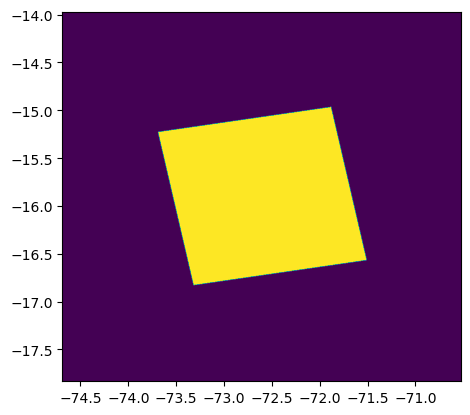

In [80]:
visualize_asset_bounds(data)

In [91]:
avg_for_dist = []
dists = np.arange(0,100,10)

for i,dist in enumerate(dists[1:]):
    mask = (sample_pts['distance'] <= dist) & (sample_pts['distance']>dists[i-1])
    mndvi = np.mean(sample_pts[mask]['ndvi'])
    avg_for_dist.append(mndvi)

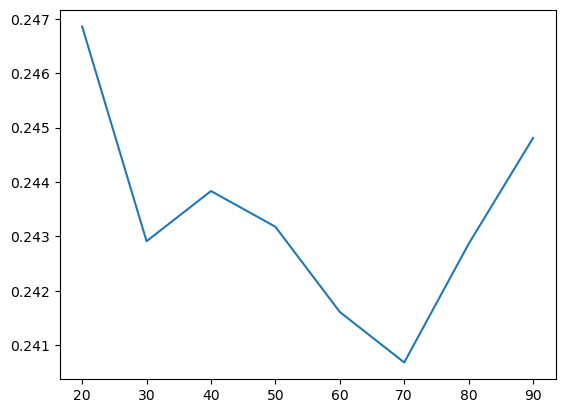

In [92]:
plt.plot(dists[1:],avg_for_dist)

In [83]:
avg_under_dist = []
dists = np.arange(0,2000,100)

for i,dist in enumerate(dists):
    mask = (sample_pts['distance'] <= dist)
    mndvi = np.mean(sample_pts[mask]['ndvi'])
    avg_under_dist.append(mndvi)

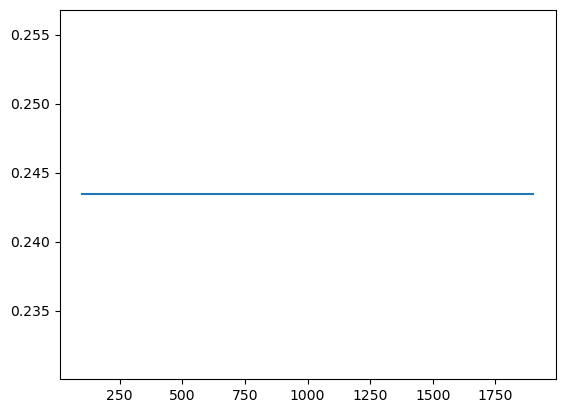

In [84]:
plt.plot(dists,avg_under_dist)

In [115]:
np.log(data['ndvi'] + 1)

<xarray.DataArray 'ndvi' (lat: 7611, lon: 7813)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon          (lon) float64 -70.97 -70.97 -70.97 ... -68.81 -68.81 -68.81
  * lat          (lat) float64 -16.29 -16.29 -16.29 -16.29 ... -18.4 -18.4 -18.4
    time         datetime64[ns] 2020-12-25T14:41:57.615958
    spatial_ref  int64 0